In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [35]:
data = pd.read_csv('SalaryData_Train.csv')
df = data.copy()

# EDA

In [36]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [38]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [39]:
df['Salary'].value_counts()

Salary
 <=50K    22653
 >50K      7508
Name: count, dtype: int64

# DATA Visualization

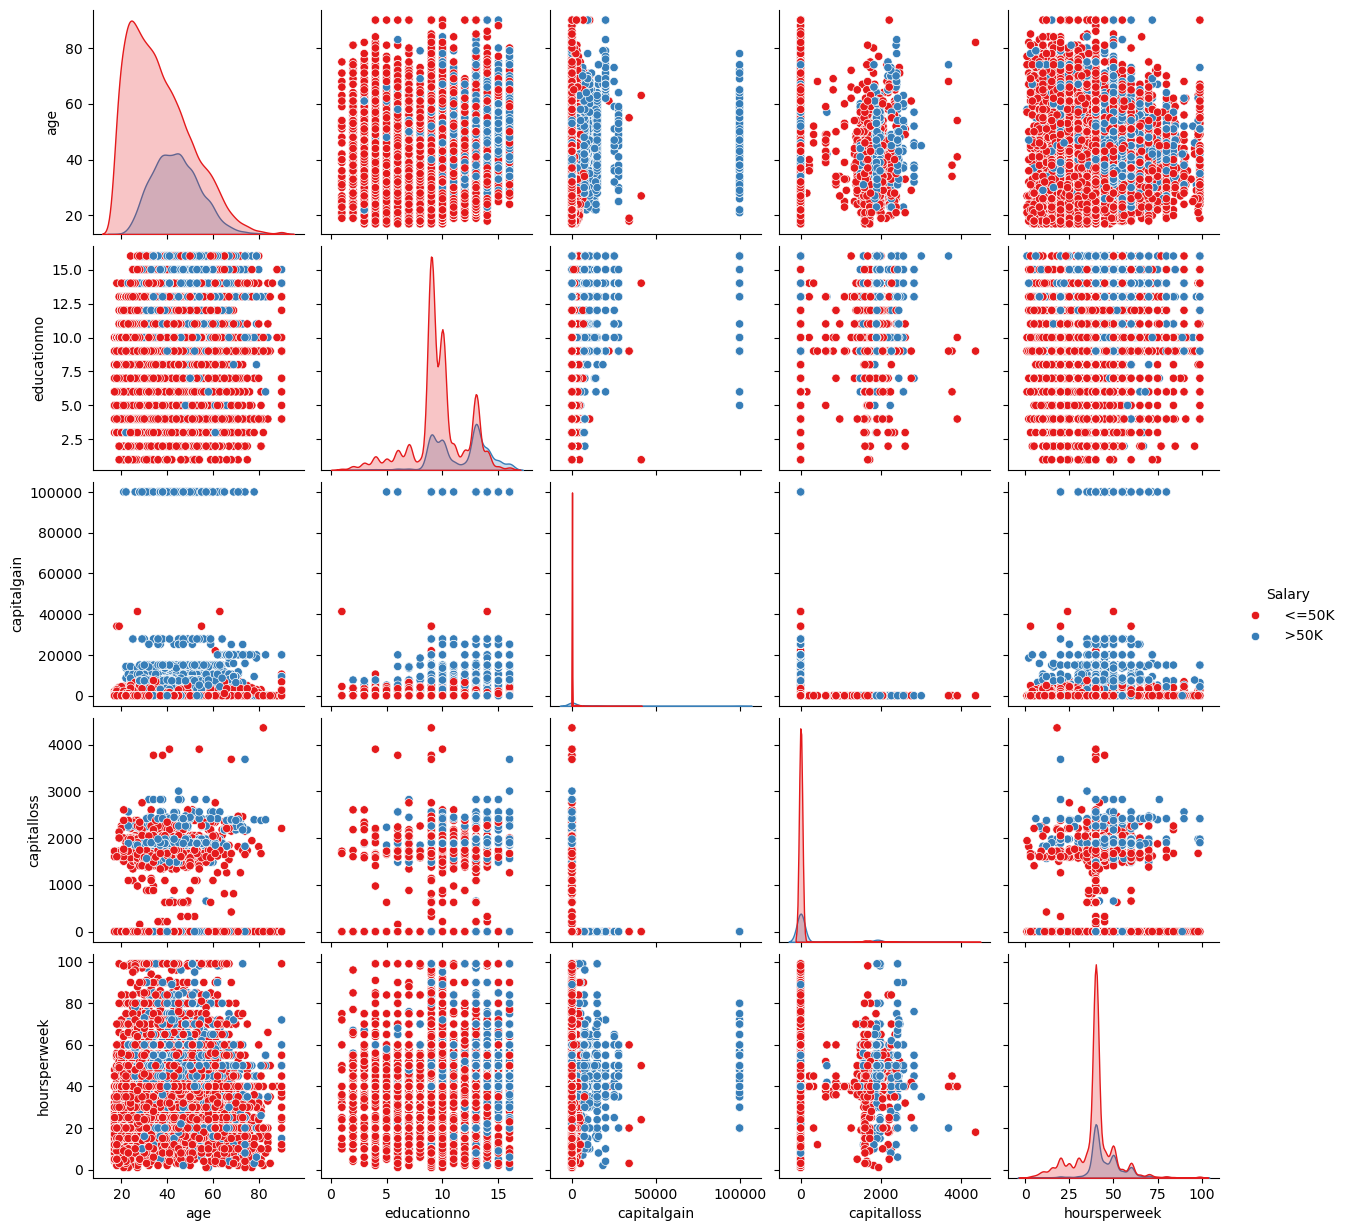

In [7]:
sns.pairplot(data = df , hue = 'Salary' , palette = 'Set1' , diag_kind = 'kde' )

<Axes: >

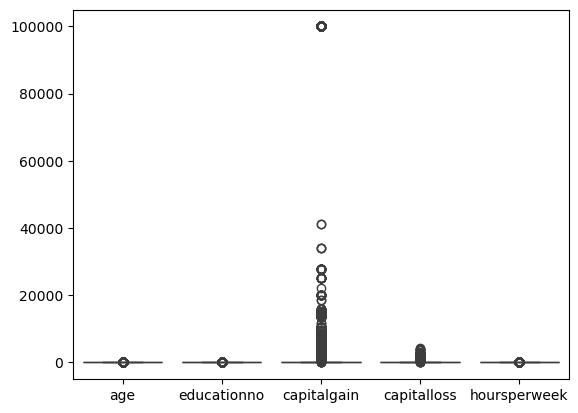

In [8]:
sns.boxplot(df)

# Data Preprocessing

### Check Duplicates

In [40]:
df.duplicated().sum()

3258

In [41]:
df.drop_duplicates(inplace = True)

In [42]:
df.duplicated().sum()

0

### Handling Missing Values

In [43]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

### Handling Outliers

In [44]:
def outliers(df , col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)
    df[col] = np.where(df[col] > upper , upper , df[col])
    df[col] = np.where(df[col] < lower , lower , df[col])
    return df
for col in df.select_dtypes(include = ['number']).columns:
    df = outliers(df , col)
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53.0,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
30155,22.0,Private,Some-college,10.0,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
30156,27.0,Private,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
30158,58.0,Private,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K


<Axes: >

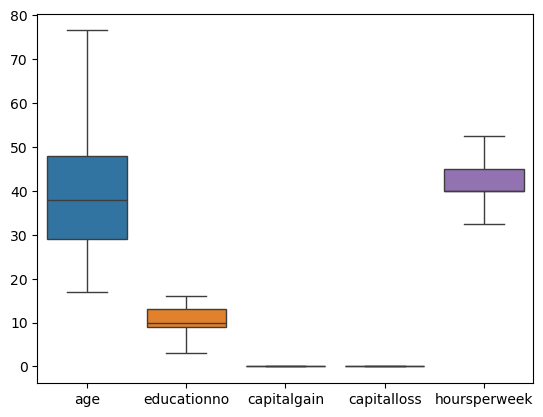

In [45]:
sns.boxplot(df)

### Reset index

In [46]:
df = df.reset_index(drop = True)

In [47]:
# Drop educationno un
df.drop(['educationno'] , axis = 1 , inplace = True)

In [48]:
numerical_columns = df.select_dtypes(include = ['number']).columns.to_list()
numerical_columns

['age', 'capitalgain', 'capitalloss', 'hoursperweek']

### Encoding

In [49]:
encoder = LabelEncoder()
for col in df.select_dtypes(include = ['object']):
    df[col] = encoder.fit_transform(df[col])

In [50]:
df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,5,9,4,0,1,4,1,0.0,0.0,40.0,37,0
1,50.0,4,9,2,3,0,4,1,0.0,0.0,32.5,37,0
2,38.0,2,11,0,5,1,4,1,0.0,0.0,40.0,37,0
3,53.0,2,1,2,5,0,2,1,0.0,0.0,40.0,37,0
4,28.0,2,9,2,9,5,2,0,0.0,0.0,40.0,4,0


In [51]:
df['Salary'].value_counts()

Salary
0    20023
1     6880
Name: count, dtype: int64

# Split data into Features and Target

In [52]:
x = df.drop(['Salary'] , axis = 1)
y = df['Salary']

### Splite data into Train & Test Sets

In [53]:
x_train , x_test , y_train , y_test = train_test_split(x,y , shuffle = True , random_state = 42 , test_size = 0.2)

In [54]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape 

((21522, 12), (5381, 12), (21522,), (5381,))

### Implement scaler on numerical columns !

In [55]:
scaler = StandardScaler()

In [56]:
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])
x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])

In [57]:
x_train.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
10505,-1.226373,2,9,4,9,3,4,1,0.0,0.0,-0.249281,37
25186,2.218530,2,5,2,2,0,4,1,0.0,0.0,-0.249281,37
16444,0.381248,1,9,2,10,5,2,0,0.0,0.0,-0.249281,37
2450,0.075035,5,12,0,9,1,4,0,0.0,0.0,0.543623,37
5940,-0.613946,2,15,0,7,3,4,0,0.0,0.0,-1.438636,37


# SVM Model

### Build Model

In [60]:
svc = SVC()

### Tarin

In [61]:
svc.fit(x_train , y_train)

SVC()

### Predict

In [62]:
y_pred = svc.predict(x_test)

### Evaluate

In [72]:
print(f'{accuracy_score(y_pred , y_test) : .2f}')
print(classification_report(y_pred , y_test))

 0.75
              precision    recall  f1-score   support

           0       1.00      0.75      0.86      5381
           1       0.00      0.00      0.00         0

    accuracy                           0.75      5381
   macro avg       0.50      0.37      0.43      5381
weighted avg       1.00      0.75      0.86      5381



C:\Users\DE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Enhancing performance of model

In [74]:
params = {'kernel' : ['linear','rbf','poly'],
          'C' : [0.1, 0.01 , 1],
          'gamma' : [0.1 , 0.01 , 1 ],
         'degree' : [0, 1, 2, 3]}
grid = GridSearchCV(SVC() , params)

In [76]:
grid.fit(x_train , y_train)

In [ ]:
grid.best_estimetor_

# Build Model Again !

In [ ]:
svc_grid = SVC(kernel = 'rbf' , C = 1 , gamma = 0.1 , degree = 2)
svc_grid.fit(x_train , y_train)
y_pred_grid = svc_grid.predict(x_test)
print(f'{accuracy_score(y_pred_grid , y_test) : .2f}')
print(classification_report(y_pred_grid , y_test))